In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_cyclone = "D:/dsproject/vit/disaster/train/Cyclone"
train_files_earthquake = "D:/dsproject/vit/disaster/train/Earthquake"
train_files_flood = "D:/dsproject/vit/disaster/train/Flood"
train_files_wildfire = "D:/dsproject/vit/disaster/train/Wildfire"

test_files_cyclone = "D:/dsproject/vit/disaster/test/Cyclone"
test_files_earthquake = "D:/dsproject/vit/disaster/test/Earthquake"
test_files_flood = "D:/dsproject/vit/disaster/test/Flood"
test_files_wildfire = "D:/dsproject/vit/disaster/test/Wildfire"

val_files_cyclone = "D:/dsproject/vit/disaster/val/Cyclone"
val_files_earthquake = "D:/dsproject/vit/disaster/val/Earthquake"
val_files_flood = "D:/dsproject/vit/disaster/val/Flood"
val_files_wildfire = "D:/dsproject/vit/disaster/val/Wildfire"


In [2]:
import sys
!python --version
print(sys.prefix)

Python 3.10.4
d:\dsproject\vit\venv


In [3]:
import torch
import torchvision

from torch import nn
from torchvision import transforms
torch.__version__

d:\dsproject\vit\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.13.0+cu117'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('D:/dsproject/vit/disaster/train',
                                                    target_size=(225, 225),
                                                    batch_size=16,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('D:/dsproject/vit/disaster/val',
                                                        target_size=(225, 225),
                                                        batch_size=8,
                                                        class_mode='categorical')

Found 3396 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_batch_size=8
                    )

Epoch 1/10


107/107 [==============================] - 174s 2s/step - loss: 1.5438 - accuracy: 0.5421 - val_loss: 0.7251 - val_accuracy: 0.7250
Epoch 2/10
107/107 [==============================] - 148s 1s/step - loss: 0.7050 - accuracy: 0.7444 - val_loss: 0.6716 - val_accuracy: 0.7417
Epoch 3/10
107/107 [==============================] - 145s 1s/step - loss: 0.5771 - accuracy: 0.7930 - val_loss: 0.7813 - val_accuracy: 0.7417
Epoch 4/10
107/107 [==============================] - 151s 1s/step - loss: 0.5075 - accuracy: 0.8216 - val_loss: 0.5287 - val_accuracy: 0.8000
Epoch 5/10
107/107 [==============================] - 136s 1s/step - loss: 0.4668 - accuracy: 0.8322 - val_loss: 0.5659 - val_accuracy: 0.8167
Epoch 6/10
107/107 [==============================] - 151s 1s/step - loss: 0.4073 - accuracy: 0.8534 - val_loss: 1.0741 - val_accuracy: 0.7083
Epoch 7/10
107/107 [==============================] - 140s 1s/step - loss: 0.3815 - accuracy: 0.8657 - val_loss: 0.5862 - val_accuracy: 0.79

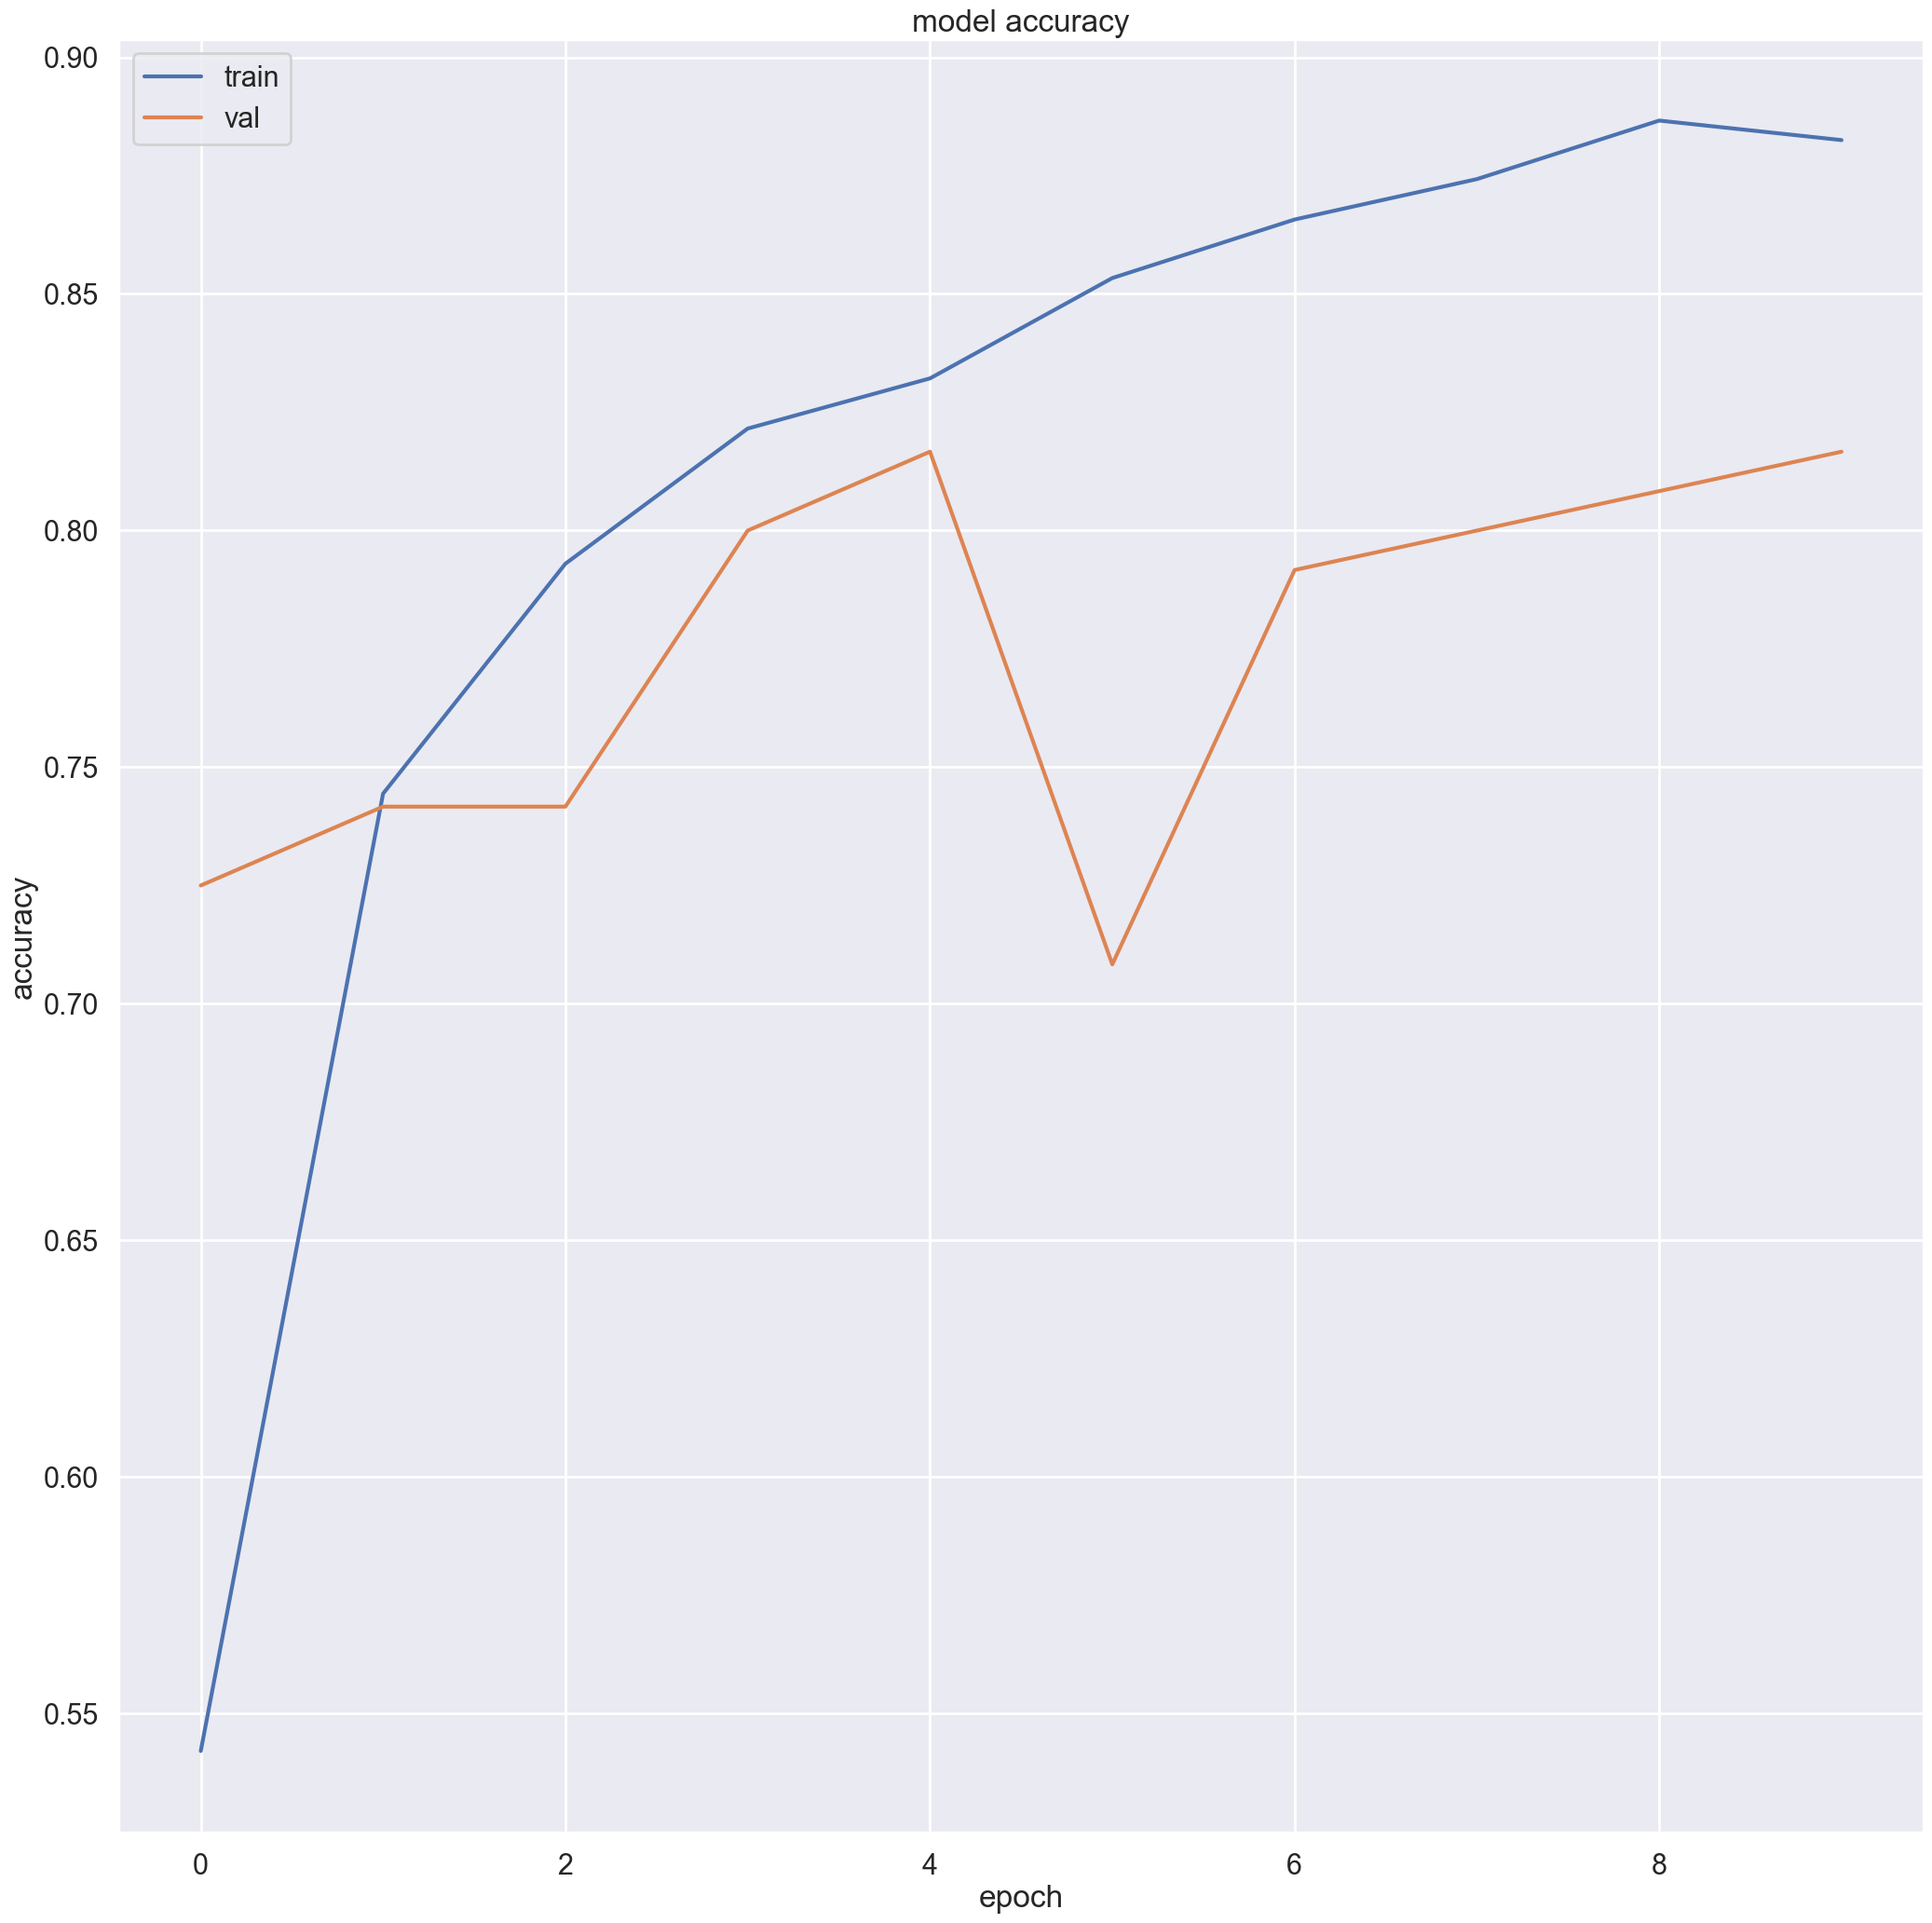

In [12]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
model.save("model.h5")

d:\dsproject\vit\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('D:/dsproject/vit/disaster/train/Wildfire/2.jpg')

In [15]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 350ms/step


array([2.4969628e-04, 7.2622979e-03, 1.4073950e-06, 9.9248660e-01],
      dtype=float32)

In [16]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Cyclone', 1: 'Earthquake', 2: 'Flood', 3: 'Wildfire'}

In [17]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Wildfire
